In [22]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#import os 
#os.environ["OMP_NUM_THREADS"] = "7"



In [23]:
df = pd.read_csv('CVD_cleaned.csv')
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [24]:
# #Integer encoding
# label_encoder = LabelEncoder()

# columns_to_encode = ["General_Health", "Checkup", "Exercise", "Heart_Disease", 
#                      "Skin_Cancer", "Other_Cancer", "Depression", "Diabetes", 
#                      "Arthritis", "Sex", "Age_Category", "Smoking_History"]

# for column in columns_to_encode:
#     df[column] = label_encoder.fit_transform(df[column])
    
#     # Display the mapping
#     print(f"Column: {column}")
#     for original_value, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
#         print(f"   {original_value} -> {encoded_value}")
#     print()
    

In [70]:
#Integer encoding 2
label_encoder = LabelEncoder()

columns_to_encode = ["Exercise", "Heart_Disease", 
                     "Skin_Cancer", "Other_Cancer", "Depression", "Diabetes", 
                     "Arthritis", "Sex", "Age_Category", "Smoking_History"]

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
        # Display the mapping
    print(f"Column: {column}")
    for original_value, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
        print(f"   {original_value} -> {encoded_value}")
    
    


Column: Exercise
   0 -> 0
   1 -> 1
Column: Heart_Disease
   0 -> 0
   1 -> 1
Column: Skin_Cancer
   0 -> 0
   1 -> 1
Column: Other_Cancer
   0 -> 0
   1 -> 1
Column: Depression
   0 -> 0
   1 -> 1
Column: Diabetes
   0 -> 0
   1 -> 1
   2 -> 2
   3 -> 3
Column: Arthritis
   0 -> 0
   1 -> 1
Column: Sex
   0 -> 0
   1 -> 1
Column: Age_Category
   0 -> 0
   1 -> 1
   2 -> 2
   3 -> 3
   4 -> 4
   5 -> 5
   6 -> 6
   7 -> 7
   8 -> 8
   9 -> 9
   10 -> 10
   11 -> 11
   12 -> 12
Column: Smoking_History
   0 -> 0
   1 -> 1


In [71]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,3,0,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,3,4,0,1,0,0,0,2,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,3,4,1,0,0,0,0,2,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,0,4,1,1,0,0,0,2,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [26]:
encoding_health = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very Good': 3, 'Excellent': 4}
df['General_Health'] = df['General_Health'].map(encoding_health)

encoding_checkup = {'Never': 0, '5 or more years ago': 1, 'Within the past 5 years': 2, 'Within the past 2 years': 3, 'Within the past year': 4}
df['Checkup'] = df['Checkup'].map(encoding_checkup)

df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,3,0,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,3,4,0,1,0,0,0,2,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,3,4,1,0,0,0,0,2,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,0,4,1,1,0,0,0,2,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [27]:
df.describe()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,2.530448,3.617981,0.775062,0.080850,0.097114,0.096738,0.200422,0.308159,0.327245,0.481321,6.535888,170.615249,83.588655,28.626211,0.405577,5.096366,29.835200,15.110441,6.296616
std,1.031224,0.815120,0.417542,0.272606,0.296113,0.295602,0.400316,0.724383,0.469208,0.499652,3.523526,10.658026,21.343210,6.522323,0.491004,8.199763,24.875735,14.926238,8.582954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,163.000000,68.040000,24.210000,0.000000,0.000000,12.000000,4.000000,2.000000
50%,3.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,170.000000,81.650000,27.440000,0.000000,1.000000,30.000000,12.000000,4.000000
75%,3.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.000000,178.000000,95.250000,31.850000,1.000000,6.000000,30.000000,20.000000,8.000000
max,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,12.000000,241.000000,293.020000,99.330000,1.000000,30.000000,120.000000,128.000000,128.000000


In [54]:
df_heart_disease_0 = df[df["Heart_Disease"] == 0]
df_heart_disease_1 = df[df["Heart_Disease"] == 1]

#min: num of 0s, num of 1s
samples_per_category = min(len(df_heart_disease_0), len(df_heart_disease_1))
#print(samples_per_category)    =     24971

sample_heart_disease_0 = df_heart_disease_0.sample(n=samples_per_category, random_state=1)
sample_heart_disease_1 = df_heart_disease_1.sample(n=samples_per_category, random_state=1)

balanced_sample = pd.concat([sample_heart_disease_0, sample_heart_disease_1])
#balanced_sample :      49942 rows × 19 columns

balanced_sample = balanced_sample.sample(frac=1, random_state=1)

df5050 = balanced_sample #.sample(n=5000, random_state=1)
df5050

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
75568,3,3,1,0,0,1,0,0,0,0,10,165.0,83.91,30.79,0,0.0,90.0,60.0,1.0
291146,1,4,0,1,1,0,0,2,1,1,11,180.0,88.45,27.20,1,4.0,15.0,15.0,10.0
34116,1,2,1,0,0,0,0,0,0,1,8,178.0,74.84,23.67,1,0.0,16.0,0.0,0.0
280032,4,2,1,0,0,0,0,0,0,1,2,165.0,56.70,20.83,1,0.0,90.0,8.0,1.0
50109,0,4,0,1,0,0,1,2,1,0,8,152.0,96.16,41.40,0,0.0,30.0,20.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71994,1,4,1,1,1,0,0,0,1,1,12,178.0,100.70,31.85,0,8.0,60.0,30.0,1.0
2048,2,4,1,1,0,1,0,0,0,0,10,160.0,68.04,26.57,1,0.0,4.0,4.0,2.0
205817,3,4,1,0,0,0,1,0,0,0,1,168.0,57.61,20.50,1,20.0,0.0,8.0,12.0
85662,3,4,1,0,0,0,0,0,0,1,6,178.0,72.57,22.96,0,3.0,30.0,4.0,4.0


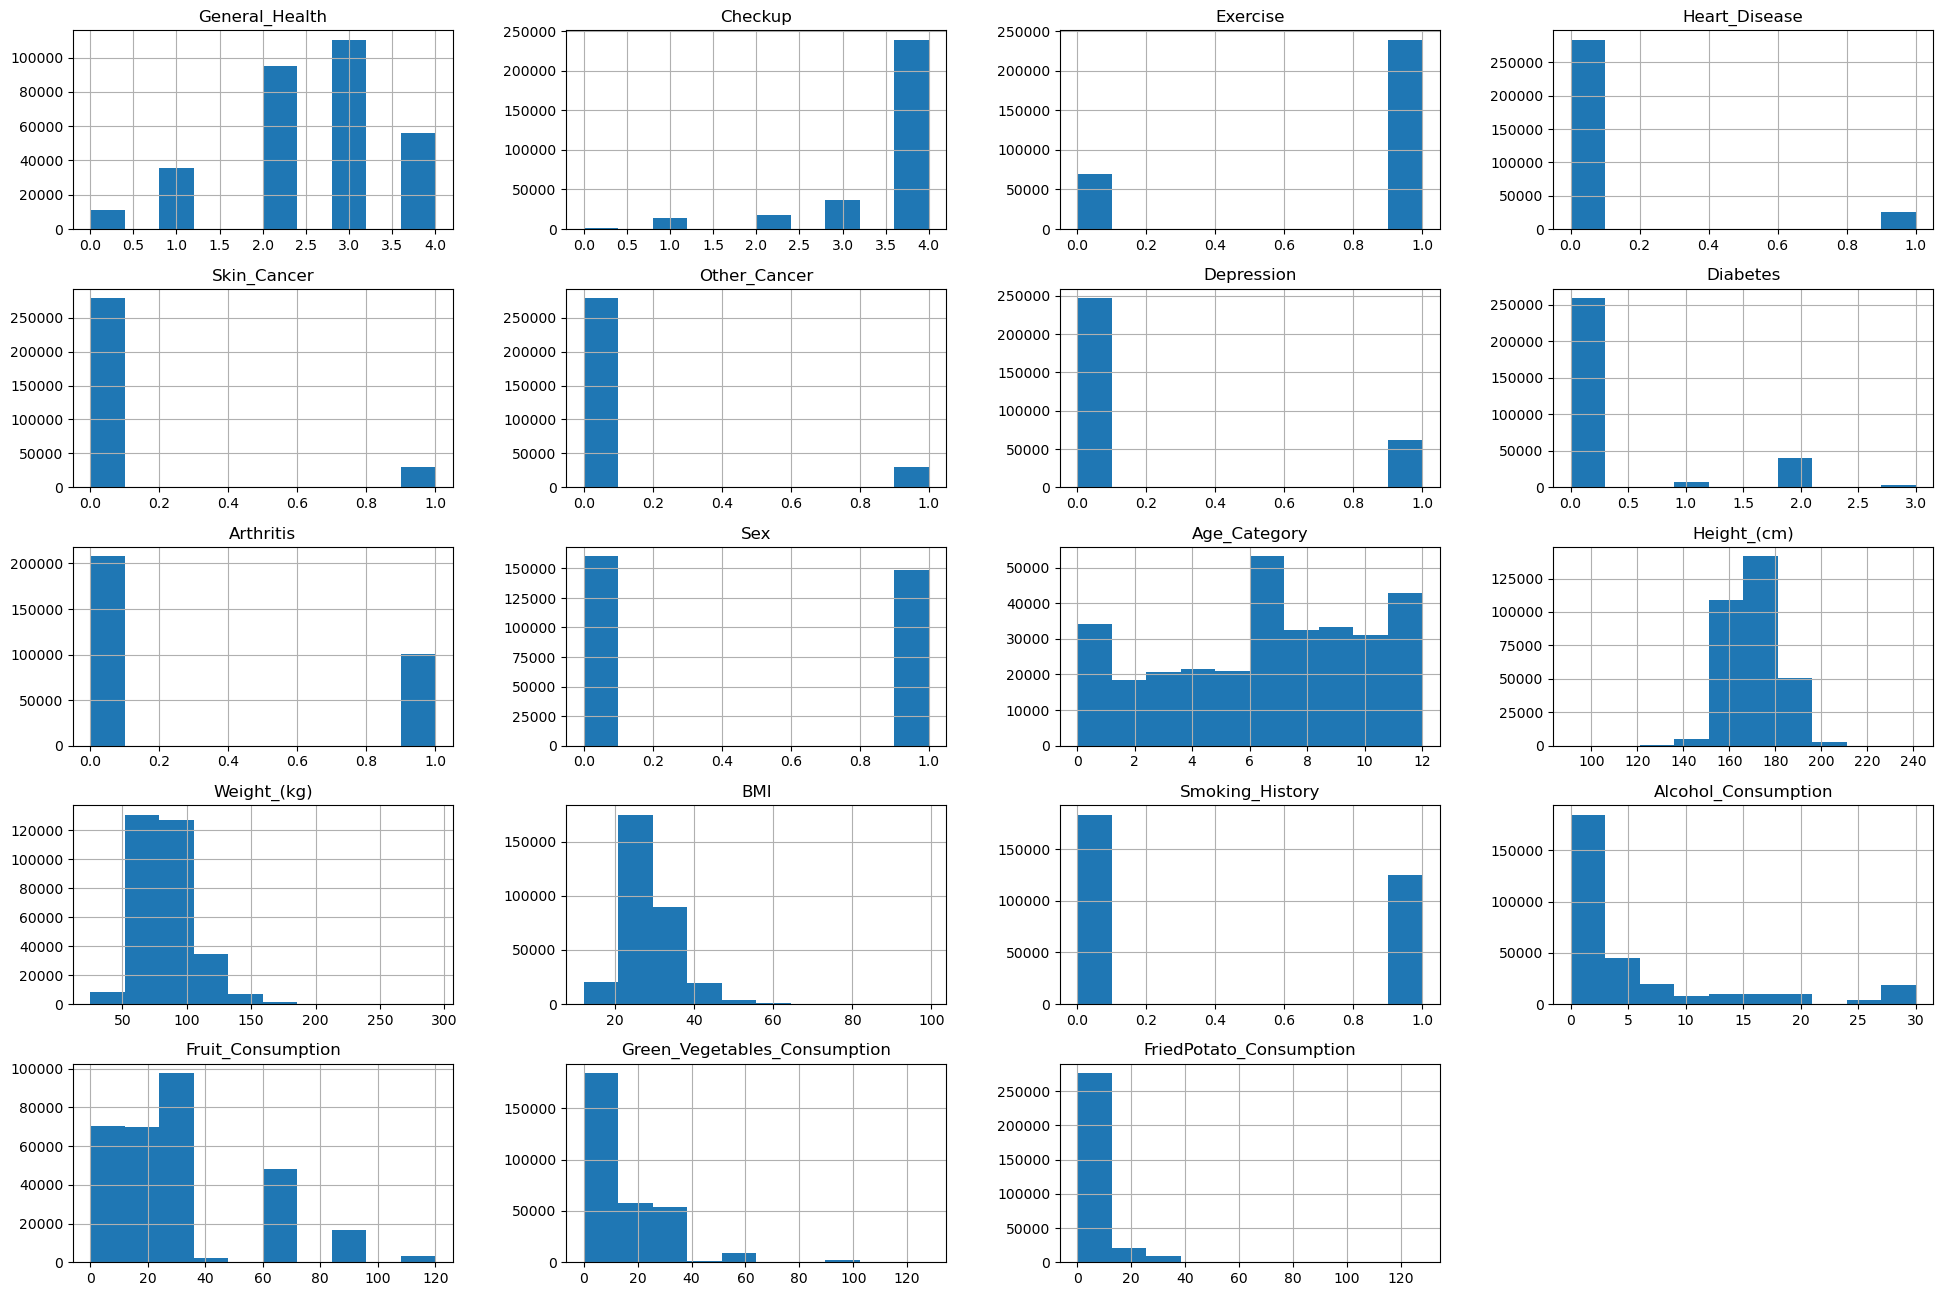

In [29]:
df.hist(figsize=(24, 16))
plt.show()

In [55]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
General_Health,1.000000,-0.088064,0.276096,-0.232503,-0.047113,-0.145640,-0.207587,-0.262828,-0.265957,0.018969,-0.167344,0.066942,-0.184238,-0.246499,-0.167608,0.118227,0.102615,0.119776,-0.031859
Checkup,-0.088064,1.000000,-0.028492,0.085596,0.084594,0.090851,0.037560,0.131445,0.159383,-0.111766,0.241318,-0.097467,0.009932,0.062898,-0.013120,-0.047527,0.045371,0.040263,-0.060559
Exercise,0.276096,-0.028492,1.000000,-0.096347,-0.003986,-0.054388,-0.084729,-0.136618,-0.124813,0.059344,-0.122345,0.091618,-0.090144,-0.155756,-0.093295,0.094959,0.136787,0.125002,-0.036930
Heart_Disease,-0.232503,0.085596,-0.096347,1.000000,0.090848,0.092387,0.032526,0.166241,0.153913,0.072595,0.229011,0.015780,0.045875,0.042666,0.107797,-0.036569,-0.020055,-0.024043,-0.009227
Skin_Cancer,-0.047113,0.084594,-0.003986,0.090848,1.000000,0.150824,-0.013014,0.032968,0.136178,0.009678,0.272074,0.006812,-0.028954,-0.037619,0.032828,0.042764,0.024123,0.012871,-0.038919
Other_Cancer,-0.145640,0.090851,-0.054388,0.092387,0.150824,1.000000,0.015892,0.063898,0.129362,-0.042044,0.234459,-0.043459,-0.021132,0.001047,0.053431,-0.008663,0.007974,-0.003237,-0.033298
Depression,-0.207587,0.037560,-0.084729,0.032526,-0.013014,0.015892,1.000000,0.053155,0.121598,-0.141450,-0.103169,-0.091318,0.047936,0.109597,0.100275,-0.028135,-0.039943,-0.051170,0.018138
Diabetes,-0.262828,0.131445,-0.136618,0.166241,0.032968,0.063898,0.053155,1.000000,0.133890,-0.013143,0.192792,-0.043098,0.158219,0.205326,0.053780,-0.114190,-0.019099,-0.027347,-0.004252
Arthritis,-0.265957,0.159383,-0.124813,0.153913,0.136178,0.129362,0.121598,0.133890,1.000000,-0.100053,0.370997,-0.097789,0.074104,0.137964,0.123196,-0.024896,-0.002012,-0.018825,-0.050961
Sex,0.018969,-0.111766,0.059344,0.072595,0.009678,-0.042044,-0.141450,-0.013143,-0.100053,1.000000,-0.060232,0.698167,0.354019,0.010989,0.073402,0.129291,-0.092462,-0.069179,0.130052


In [31]:
#sns.pairplot(df)

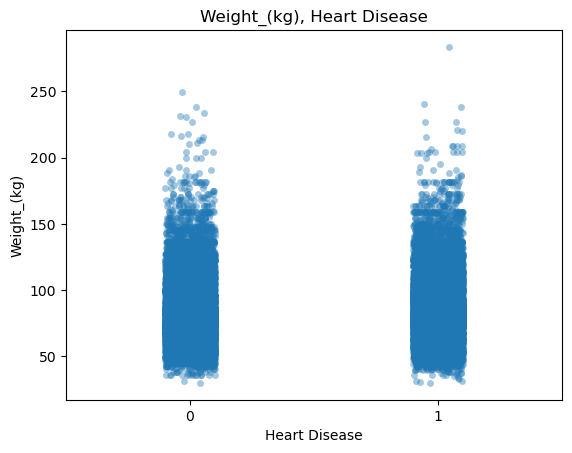

In [56]:
sns.stripplot(data=df5050, x="Heart_Disease", y="Weight_(kg)", jitter=True, alpha=0.4)
plt.title("Weight_(kg), Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Weight_(kg)")
plt.show()

In [57]:
corr_matrix = df5050.corr(numeric_only=True)
corr_matrix

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
General_Health,1.000000,-0.118099,0.319325,-0.392132,-0.066663,-0.154641,-0.214320,-0.297532,-0.296708,0.002816,-0.226335,0.061845,-0.155617,-0.210766,-0.199121,0.145923,0.094292,0.120096,-0.024794
Checkup,-0.118099,1.000000,-0.048953,0.178234,0.075996,0.084701,0.018657,0.141323,0.152533,-0.054772,0.271582,-0.064658,0.021022,0.058213,0.013219,-0.056109,0.024862,0.020614,-0.058736
Exercise,0.319325,-0.048953,1.000000,-0.166395,-0.010778,-0.063764,-0.107295,-0.165941,-0.143508,0.063203,-0.141551,0.090885,-0.087936,-0.152230,-0.105359,0.104263,0.130563,0.129235,-0.036137
Heart_Disease,-0.392132,0.178234,-0.166395,1.000000,0.144909,0.144004,0.057073,0.255435,0.272042,0.137219,0.444178,0.031894,0.086149,0.079707,0.195258,-0.062883,-0.038530,-0.046977,-0.016685
Skin_Cancer,-0.066663,0.075996,-0.010778,0.144909,1.000000,0.155123,-0.014316,0.032101,0.126054,0.053366,0.267000,0.038547,-0.017623,-0.041452,0.029263,0.030056,0.019450,0.006650,-0.023427
Other_Cancer,-0.154641,0.084701,-0.063764,0.144004,0.155123,1.000000,0.022779,0.062155,0.120968,-0.024628,0.215859,-0.033830,-0.033578,-0.017716,0.061734,-0.014148,0.001980,-0.004237,-0.024722
Depression,-0.214320,0.018657,-0.107295,0.057073,-0.014316,0.022779,1.000000,0.071552,0.140802,-0.145088,-0.111344,-0.098990,0.047790,0.112555,0.092295,-0.041307,-0.034091,-0.043336,0.011578
Diabetes,-0.297532,0.141323,-0.165941,0.255435,0.032101,0.062155,0.071552,1.000000,0.141721,0.027347,0.197786,-0.014974,0.188982,0.223168,0.073174,-0.142488,-0.028822,-0.034980,0.007281
Arthritis,-0.296708,0.152533,-0.143508,0.272042,0.126054,0.120968,0.140802,0.141721,1.000000,-0.087785,0.338537,-0.097863,0.077386,0.141658,0.128179,-0.053511,-0.001457,-0.035255,-0.038037
Sex,0.002816,-0.054772,0.063203,0.137219,0.053366,-0.024628,-0.145088,0.027347,-0.087785,1.000000,0.011251,0.698045,0.352495,0.010898,0.103560,0.132795,-0.086908,-0.059145,0.128171


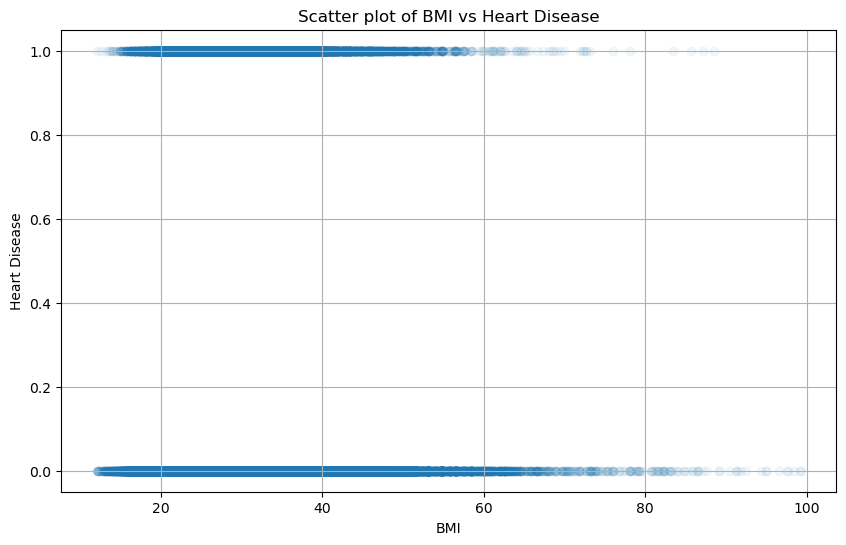

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(df['BMI'], df['Heart_Disease'], alpha=0.05)  # Set alpha to 0.5 for 50% transparency
plt.xlabel('BMI')
plt.ylabel('Heart Disease')
plt.title('Scatter plot of BMI vs Heart Disease')
plt.grid(True)
plt.show()


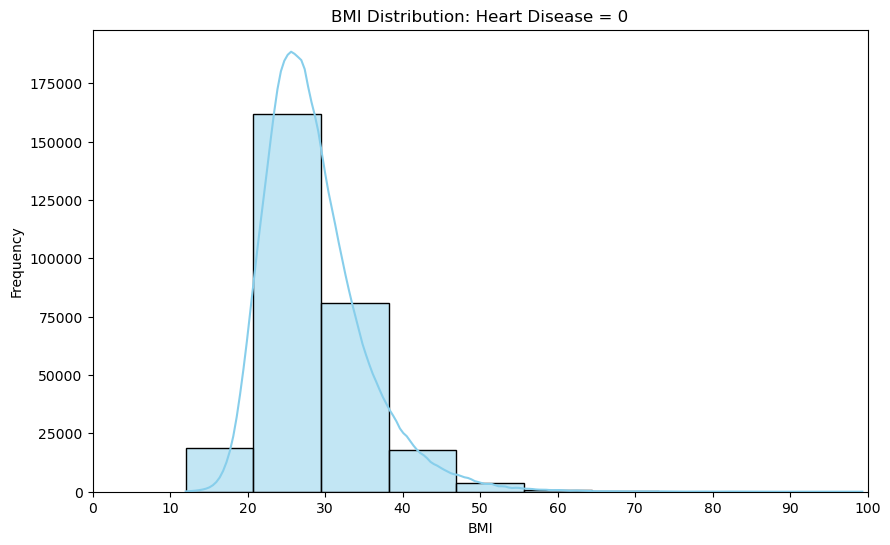

In [59]:
# Filter the data where Heart_Disease is 0
df_no_disease = df[df['Heart_Disease'] == 0]

# Plot the distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(df_no_disease['BMI'], kde=True, bins=10, color='skyblue')
plt.title('BMI Distribution: Heart Disease = 0')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.xlim(0, 100)  # Setting the x-axis limits
plt.xticks(range(0, 101, 10))  # Setting ticks every 10 units
plt.show()

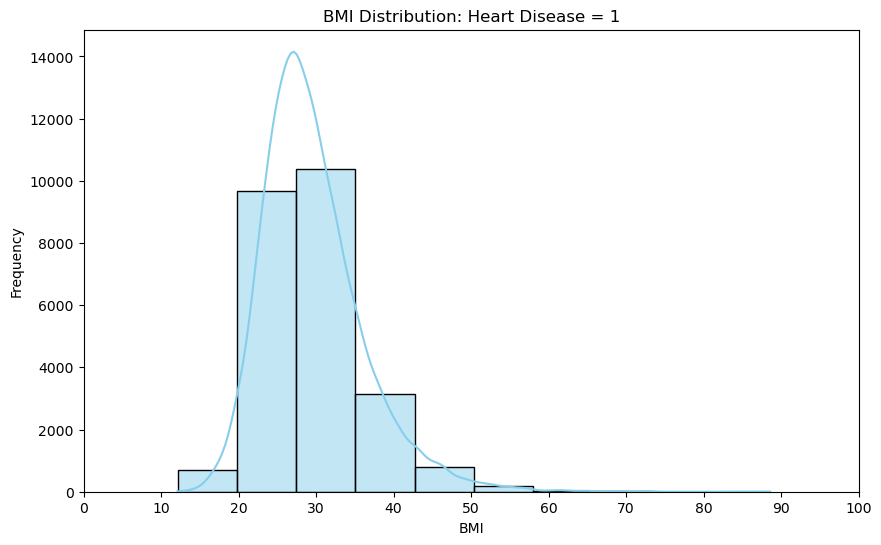

In [60]:
# Filter the data where Heart_Disease is 1
df_no_disease = df[df['Heart_Disease'] == 1]

# Plot the distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(df_no_disease['BMI'], kde=True, bins=10, color='skyblue')
plt.title('BMI Distribution: Heart Disease = 1')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.xlim(0, 100)  # Setting the x-axis limits
plt.xticks(range(0, 101, 10))  # Setting ticks every 10 units
plt.show()

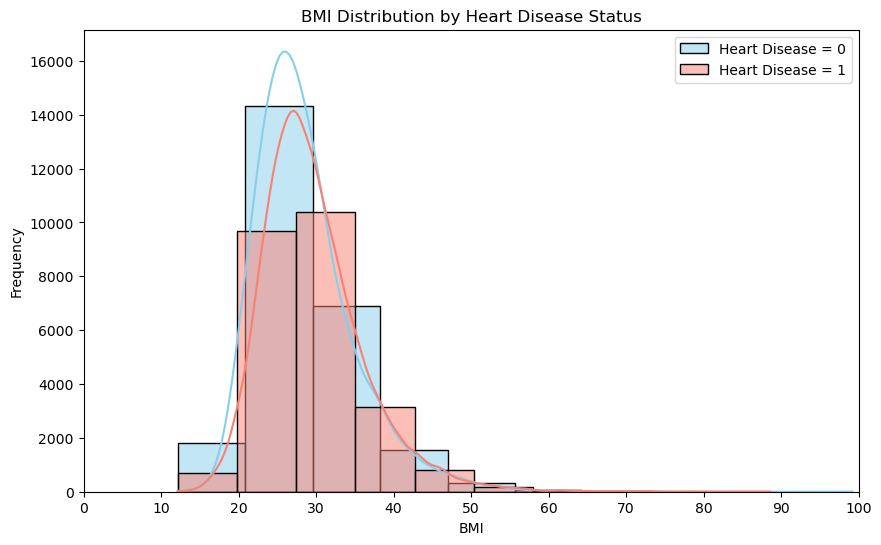

In [61]:
# Filter the data where Heart_Disease is 0
df_no_disease = df5050[df5050['Heart_Disease'] == 0]

# Plot the distribution of BMI for Heart_Disease = 0
plt.figure(figsize=(10, 6))
sns.histplot(df_no_disease['BMI'], kde=True, bins=10, color='skyblue', label='Heart Disease = 0')

# Filter the data where Heart_Disease is 1
df_disease = df5050[df5050['Heart_Disease'] == 1]

# Plot the distribution of BMI for Heart_Disease = 1, with different color
sns.histplot(df_disease['BMI'], kde=True, bins=10, color='salmon', label='Heart Disease = 1')

plt.title('BMI Distribution by Heart Disease Status')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.xlim(0, 100)  # Setting the x-axis limits
plt.xticks(range(0, 101, 10))  # Setting ticks every 10 units
plt.legend()  # Show legend
plt.show()

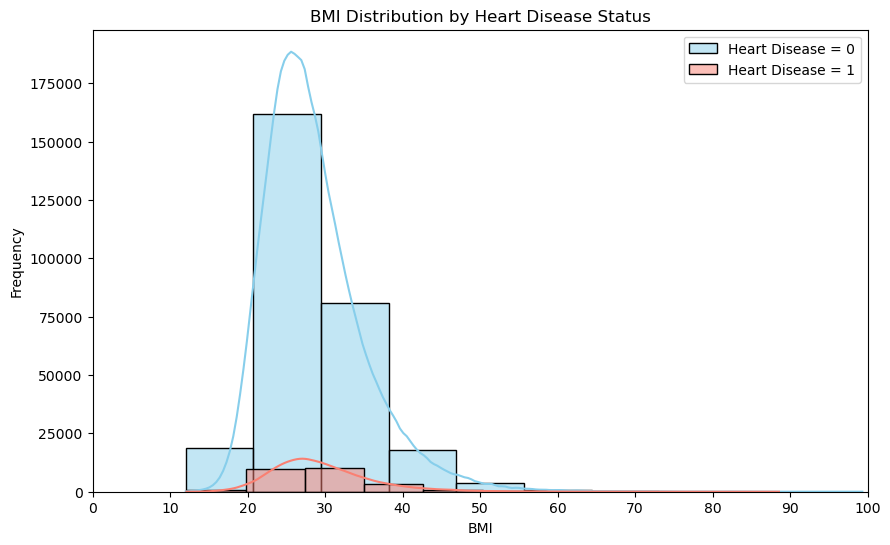

In [72]:
# Filter the data where Heart_Disease is 0
df_no_disease = df[df['Heart_Disease'] == 0]

# Plot the distribution of BMI for Heart_Disease = 0
plt.figure(figsize=(10, 6))
sns.histplot(df_no_disease['BMI'], kde=True, bins=10, color='skyblue', label='Heart Disease = 0')

# Filter the data where Heart_Disease is 1
df_disease = df[df['Heart_Disease'] == 1]

# Plot the distribution of BMI for Heart_Disease = 1, with different color
sns.histplot(df_disease['BMI'], kde=True, bins=10, color='salmon', label='Heart Disease = 1')

plt.title('BMI Distribution by Heart Disease Status')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.xlim(0, 100)  # Setting the x-axis limits
plt.xticks(range(0, 101, 10))  # Setting ticks every 10 units
plt.legend()  # Show legend
plt.show()

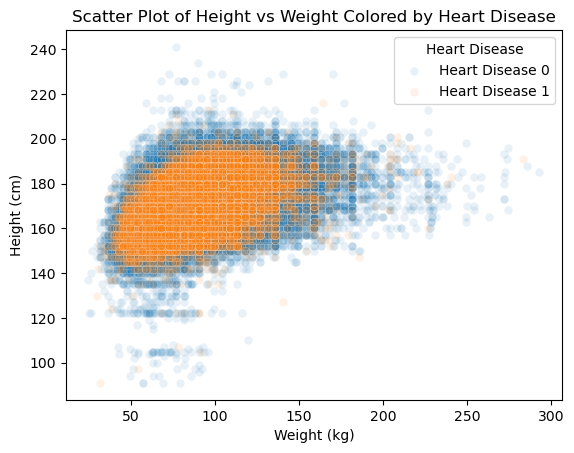

In [75]:
# Separate data based on Heart_Disease value
df_heart_disease_0 = df[df['Heart_Disease'] == 0]
df_heart_disease_1 = df[df['Heart_Disease'] == 1]


# scatter plot for Heart_Disease = 0 
sns.scatterplot(x='Weight_(kg)', y='Height_(cm)', data=df_heart_disease_0, alpha=0.1, label='Heart Disease 0')

# scatter plot for Heart_Disease = 1
sns.scatterplot(x='Weight_(kg)', y='Height_(cm)', data=df_heart_disease_1, alpha=0.1, label='Heart Disease 1')



# show plot
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.title('Scatter Plot of Height vs Weight Colored by Heart Disease')
plt.legend(title='Heart Disease')
plt.show()

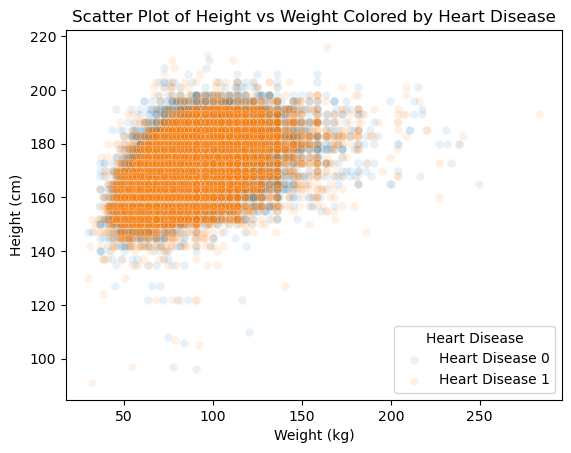

In [64]:
# Separate data based on Heart_Disease value
df_heart_disease_0 = df5050[df5050['Heart_Disease'] == 0]
df_heart_disease_1 = df5050[df5050['Heart_Disease'] == 1]


# scatter plot for Heart_Disease = 0 
sns.scatterplot(x='Weight_(kg)', y='Height_(cm)', data=df_heart_disease_0, alpha=0.1, label='Heart Disease 0')

# scatter plot for Heart_Disease = 1
sns.scatterplot(x='Weight_(kg)', y='Height_(cm)', data=df_heart_disease_1, alpha=0.1, label='Heart Disease 1')



# show plot
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.title('Scatter Plot of Height vs Weight Colored by Heart Disease')
plt.legend(title='Heart Disease')
plt.show()

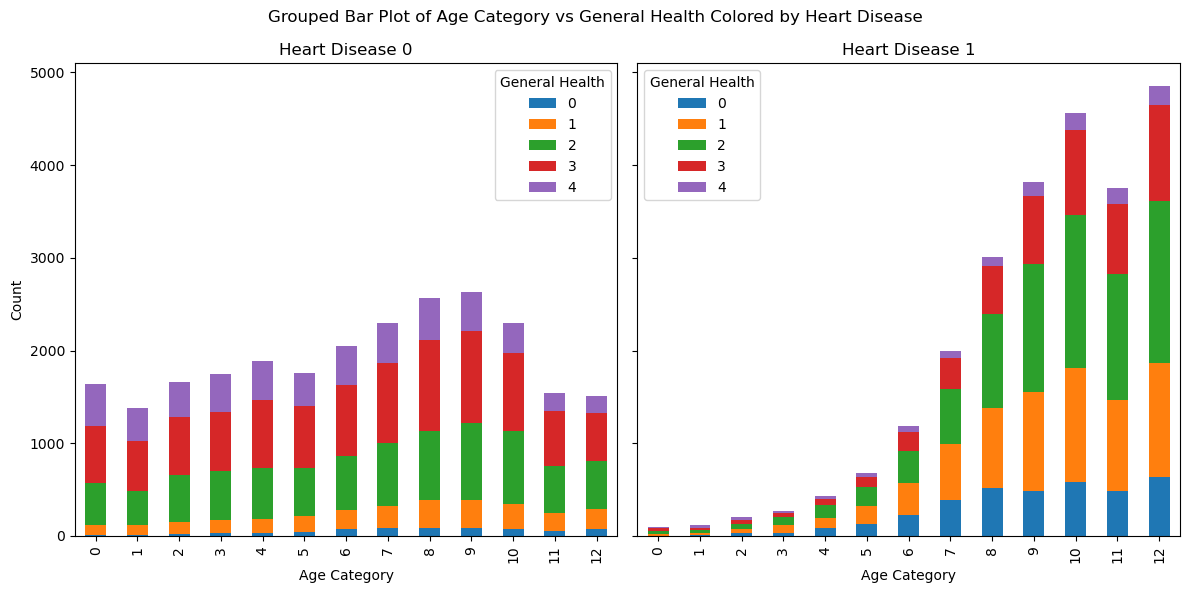

In [65]:
df_heart_disease_0 = df5050[df5050['Heart_Disease'] == 0]
df_heart_disease_1 = df5050[df5050['Heart_Disease'] == 1]

# Group data by Age_Category and General_Health for each Heart_Disease value
grouped_heart_disease_0 = df_heart_disease_0.groupby(['Age_Category', 'General_Health']).size().unstack(fill_value=0)
grouped_heart_disease_1 = df_heart_disease_1.groupby(['Age_Category', 'General_Health']).size().unstack(fill_value=0)

# Plot grouped bar plot
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Heart Disease 0
grouped_heart_disease_0.plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('Heart Disease 0')
ax[0].set_xlabel('Age Category')
ax[0].set_ylabel('Count')
ax[0].legend(title='General Health')

# Heart Disease 1
grouped_heart_disease_1.plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Heart Disease 1')
ax[1].set_xlabel('Age Category')
ax[1].legend(title='General Health')

plt.suptitle('Grouped Bar Plot of Age Category vs General Health Colored by Heart Disease')
plt.tight_layout()
plt.show()

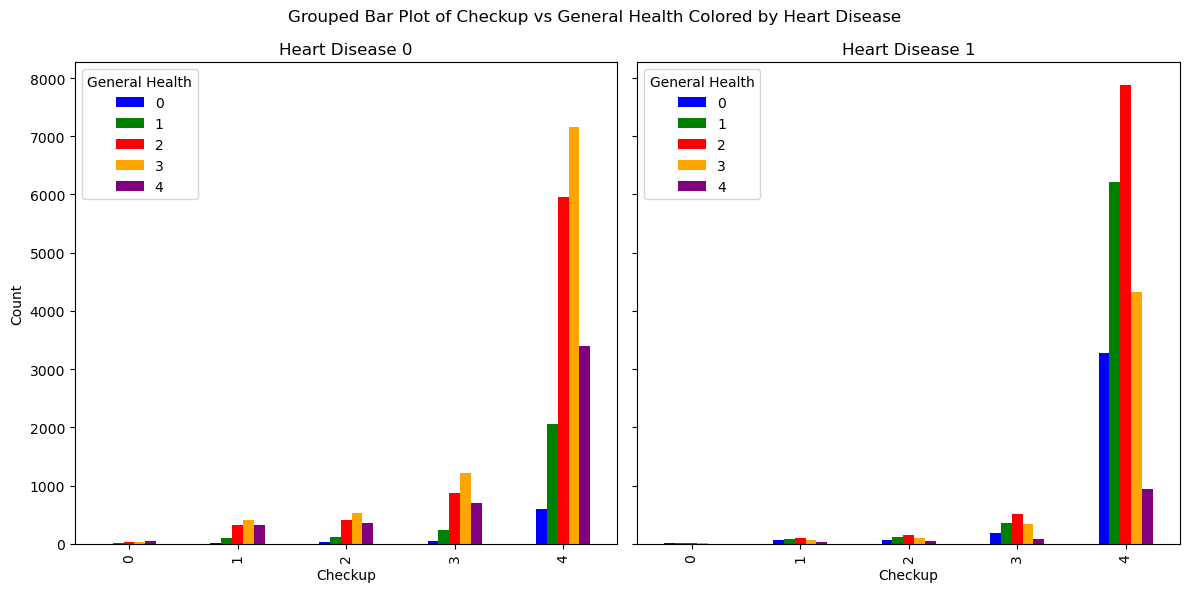

In [68]:
# Plot grouped bar plot
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Heart Disease 0
grouped_heart_disease_0.plot(kind='bar', stacked=False, ax=ax[0], color=['blue', 'green', 'red', 'orange', 'purple'])
ax[0].set_title('Heart Disease 0')
ax[0].set_xlabel('Checkup')
ax[0].set_ylabel('Count')
ax[0].legend(title='General Health')

# Heart Disease 1
grouped_heart_disease_1.plot(kind='bar', stacked=False, ax=ax[1], color=['blue', 'green', 'red', 'orange', 'purple'])
ax[1].set_title('Heart Disease 1')
ax[1].set_xlabel('Checkup')
ax[1].legend(title='General Health')

plt.suptitle('Grouped Bar Plot of Checkup vs General Health Colored by Heart Disease')
plt.tight_layout()
plt.show()

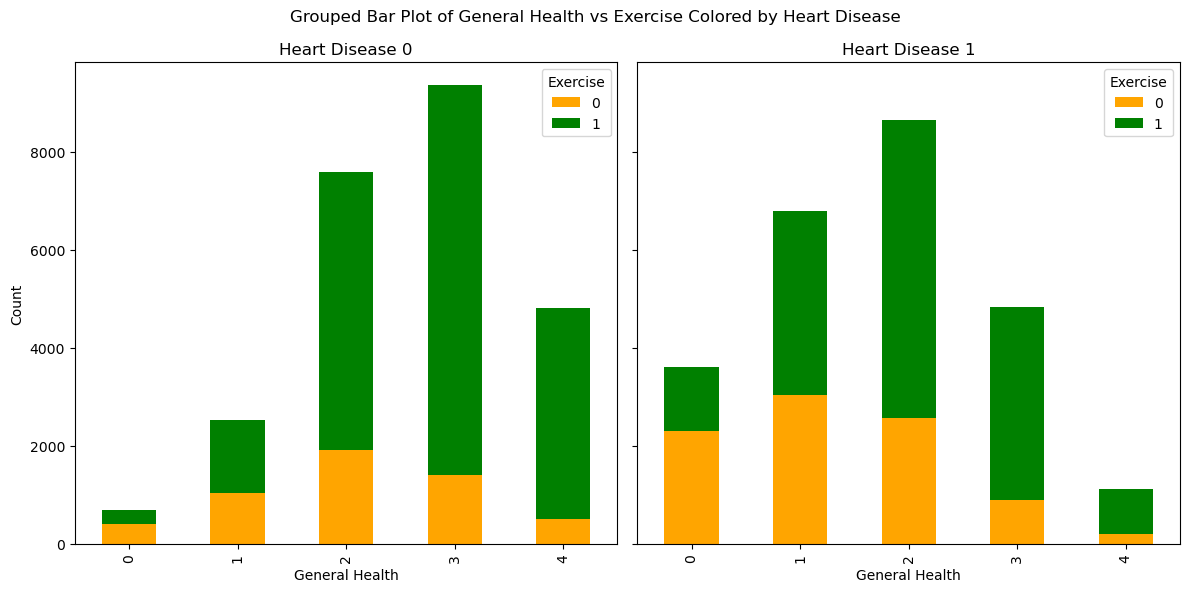

In [89]:
df_heart_disease_0 = df5050[df5050['Heart_Disease'] == 0]
df_heart_disease_1 = df5050[df5050['Heart_Disease'] == 1]

grouped_heart_disease_0 = df_heart_disease_0.groupby(['General_Health', 'Exercise']).size().unstack(fill_value=0)
grouped_heart_disease_1 = df_heart_disease_1.groupby(['General_Health', 'Exercise']).size().unstack(fill_value=0)

# Plot grouped bar plot
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Heart Disease 0
grouped_heart_disease_0.plot(kind='bar', stacked=True, ax=ax[0], color=['orange', 'green'])
ax[0].set_title('Heart Disease 0')
ax[0].set_xlabel('General Health')
ax[0].set_ylabel('Count')
ax[0].legend(title='Exercise')

# Heart Disease 1
grouped_heart_disease_1.plot(kind='bar', stacked=True, ax=ax[1], color=['orange', 'green'])
ax[1].set_title('Heart Disease 1')
ax[1].set_xlabel('General Health')
ax[1].legend(title='Exercise')

plt.suptitle('Grouped Bar Plot of General Health vs Exercise Colored by Heart Disease')
plt.tight_layout()
plt.show()

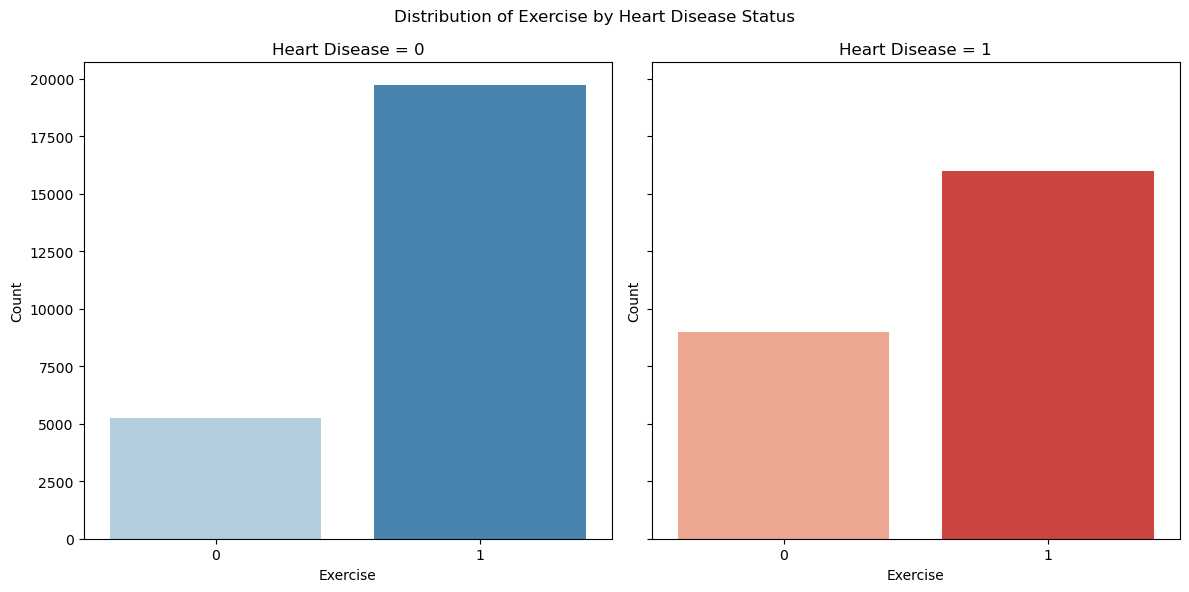

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Filter the data where Heart_Disease is 0 and 1 respectively
df_no_disease = df5050[df5050['Heart_Disease'] == 0]
df_disease = df5050[df5050['Heart_Disease'] == 1]

# Plot for Heart Disease = 0
sns.countplot(x='Exercise', data=df_no_disease, ax=axes[0], palette='Blues')
axes[0].set_title('Heart Disease = 0')
axes[0].set_xlabel('Exercise')
axes[0].set_ylabel('Count')

# Plot for Heart Disease = 1
sns.countplot(x='Exercise', data=df_disease, ax=axes[1], palette='Reds')
axes[1].set_title('Heart Disease = 1')
axes[1].set_xlabel('Exercise')
axes[1].set_ylabel('Count')

plt.suptitle('Distribution of Exercise by Heart Disease Status')
plt.tight_layout()
plt.show()

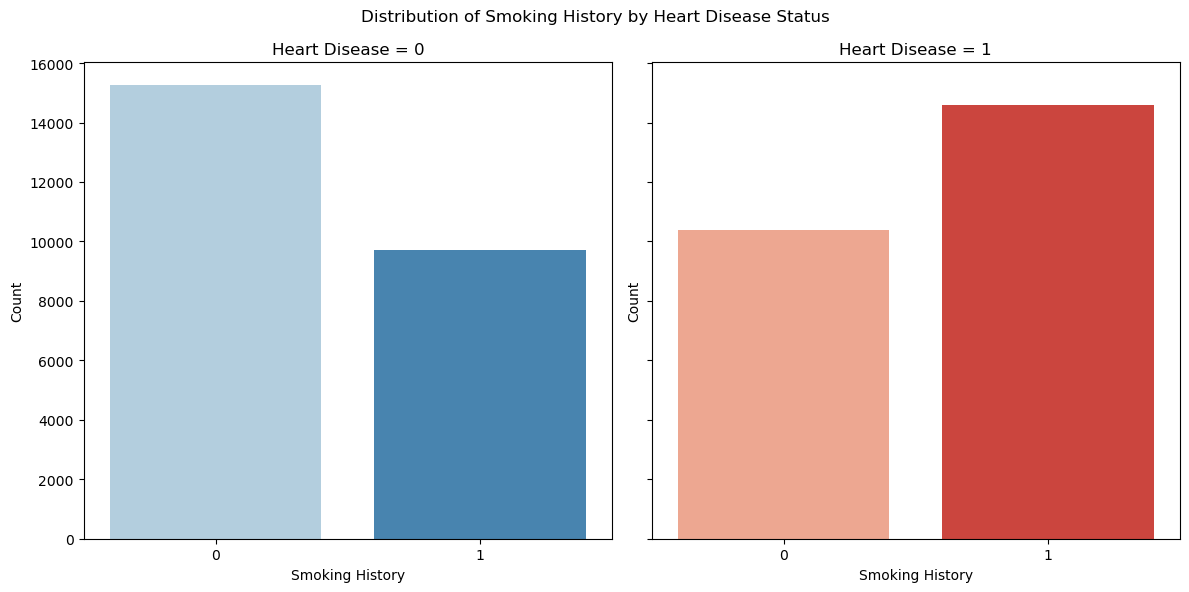

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Filter the data where Heart_Disease is 0 and 1 respectively
df_no_disease = df5050[df5050['Heart_Disease'] == 0]
df_disease = df5050[df5050['Heart_Disease'] == 1]

# Plot for Heart Disease = 0
sns.countplot(x='Smoking_History', data=df_no_disease, ax=axes[0], palette='Blues')
axes[0].set_title('Heart Disease = 0')
axes[0].set_xlabel('Smoking History')
axes[0].set_ylabel('Count')

# Plot for Heart Disease = 1
sns.countplot(x='Smoking_History', data=df_disease, ax=axes[1], palette='Reds')
axes[1].set_title('Heart Disease = 1')
axes[1].set_xlabel('Smoking History')
axes[1].set_ylabel('Count')

plt.suptitle('Distribution of Smoking History by Heart Disease Status')
plt.tight_layout()
plt.show()

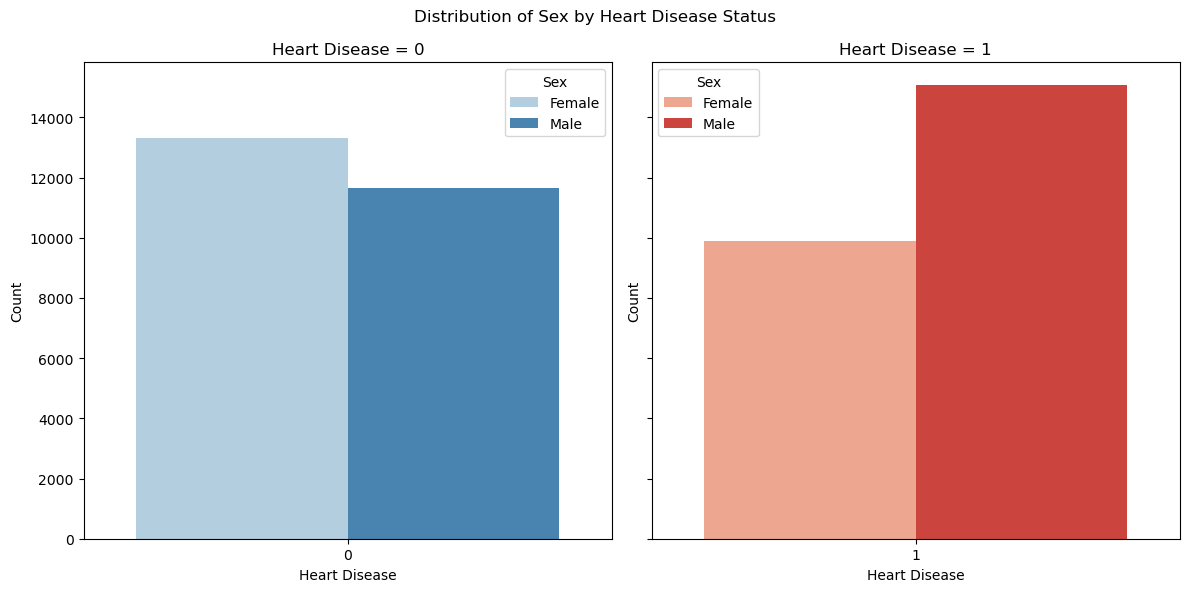

In [81]:
# Create a new figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Filter the data where Heart_Disease is 0 and 1 respectively
df_no_disease = df5050[df5050['Heart_Disease'] == 0]
df_disease = df5050[df5050['Heart_Disease'] == 1]

# Plot for Heart Disease = 0
sns.countplot(x='Heart_Disease', hue='Sex', data=df_no_disease, ax=axes[0], palette='Blues', hue_order=[0, 1])
axes[0].set_title('Heart Disease = 0')
axes[0].set_xlabel('Heart Disease')
axes[0].set_ylabel('Count')
axes[0].legend(title='Sex', labels=['Female', 'Male'])

# Plot for Heart Disease = 1
sns.countplot(x='Heart_Disease', hue='Sex', data=df_disease, ax=axes[1], palette='Reds', hue_order=[0, 1])
axes[1].set_title('Heart Disease = 1')
axes[1].set_xlabel('Heart Disease')
axes[1].set_ylabel('Count')
axes[1].legend(title='Sex', labels=['Female', 'Male'])

plt.suptitle('Distribution of Sex by Heart Disease Status')
plt.tight_layout()
plt.show()

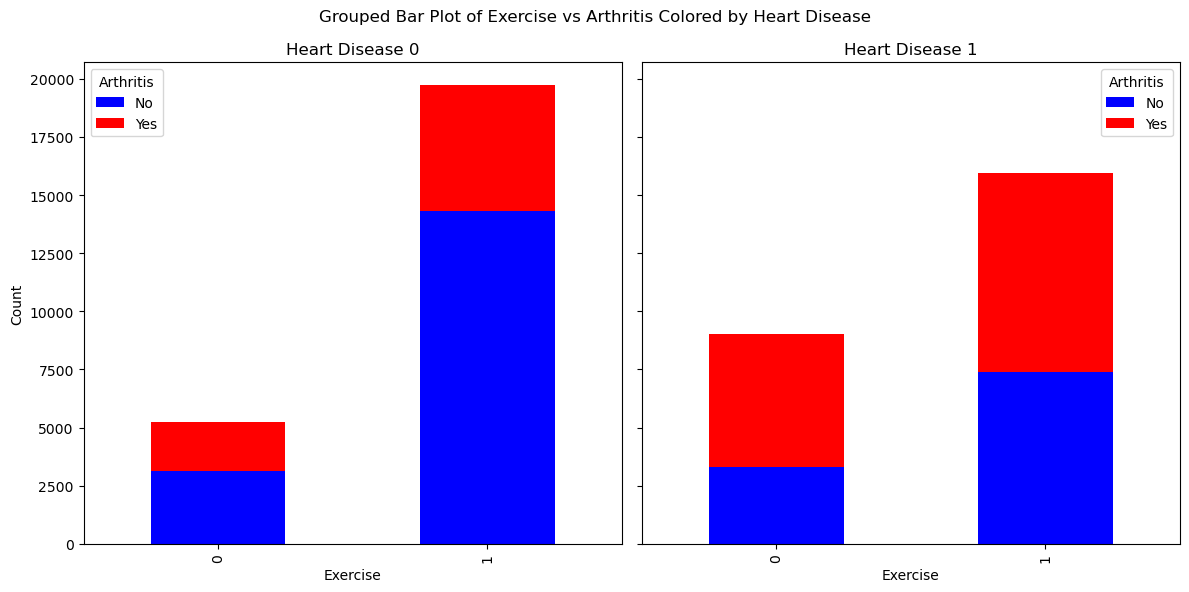

In [83]:
df_heart_disease_0 = df5050[df5050['Heart_Disease'] == 0]
df_heart_disease_1 = df5050[df5050['Heart_Disease'] == 1]

# Group data by Exercise and Arthritis for each Heart_Disease value
grouped_heart_disease_0 = df_heart_disease_0.groupby(['Exercise', 'Arthritis']).size().unstack(fill_value=0)
grouped_heart_disease_1 = df_heart_disease_1.groupby(['Exercise', 'Arthritis']).size().unstack(fill_value=0)

# Plot grouped bar plot
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Heart Disease 0
grouped_heart_disease_0.plot(kind='bar', stacked=True, ax=ax[0], color=['blue', 'red'])
ax[0].set_title('Heart Disease 0')
ax[0].set_xlabel('Exercise')
ax[0].set_ylabel('Count')
ax[0].legend(title='Arthritis', labels=['No', 'Yes'])

# Heart Disease 1
grouped_heart_disease_1.plot(kind='bar', stacked=True, ax=ax[1], color=['blue', 'red'])
ax[1].set_title('Heart Disease 1')
ax[1].set_xlabel('Exercise')
ax[1].legend(title='Arthritis', labels=['No', 'Yes'])

plt.suptitle('Grouped Bar Plot of Exercise vs Arthritis Colored by Heart Disease')
plt.tight_layout()
plt.show()

In [ ]:
#Integer encoding 2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()

columns_to_encode = ["Exercise", "Heart_Disease", 
                     "Skin_Cancer", "Other_Cancer", "Depression", 
                     "Arthritis", "Sex", "Age_Category", "Smoking_History"]

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
        # Display the mapping
    print(f"Column: {column}")
    for original_value, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
        print(f"   {original_value} -> {encoded_value}")

encoding_health = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very Good': 3, 'Excellent': 4}
df['General_Health'] = df['General_Health'].map(encoding_health)

encoding_checkup = {'Never': 0, '5 or more years ago': 1, 'Within the past 5 years': 2, 'Within the past 2 years': 3, 'Within the past year': 4}
df['Checkup'] = df['Checkup'].map(encoding_checkup)

df.head()

diabetes_data = df[['Diabetes']]

#Initialize OneHotEncoder
encoder = OneHotEncoder()

#Fit and transform the data
encoded_data = encoder.fit_transform(diabetes_data)

#Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Diabetes']))

#Concatenate the original DataFrame with the encoded DataFrame
df_encoded = pd.concat([df.drop(columns=['Diabetes']), encoded_df], axis=1)

df_encoded
    
    
